In [15]:
import torch
import warnings

warnings.filterwarnings(action='ignore')

### First model

In [16]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

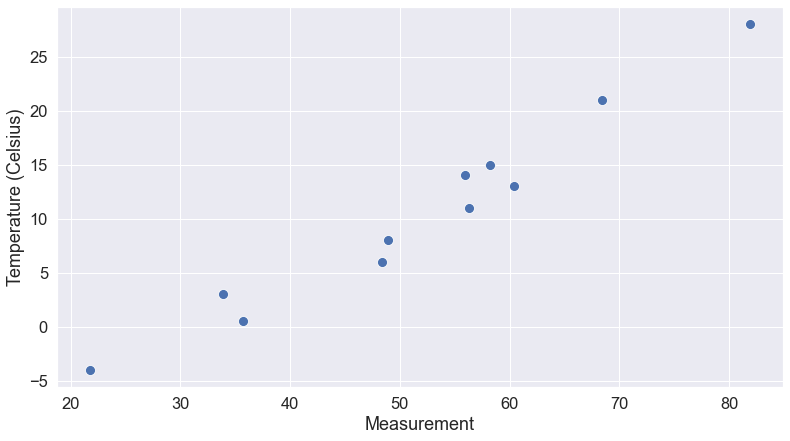

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')
sns.set(font_scale=1.5)
plt.figure(figsize=(13, 7))
ax = sns.scatterplot(x=t_u, y=t_c, s=100)
ax.set(xlabel='Measurement', ylabel='Temperature (Celsius)')
plt.show()

In [18]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [19]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [20]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

### Broadcasting

In [21]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)
print('Shapes')
print(f'x: {x.shape}, y: {y.shape}')
print(f'z: {z.shape}, a: {a.shape}')
print('x * y:', (x * y).shape)
print('y * z:', (y * z).shape)
print('y * z * a:', (y * z * a).shape)

Shapes
x: torch.Size([]), y: torch.Size([3, 1])
z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


### Gradient Descent

In [22]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2 * delta)
loss_rate_of_change_w

tensor(4517.2974)

In [23]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [24]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b - delta), t_c)) / (2 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [25]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [26]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [27]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [28]:
training_loop(n_epochs=100,
              learning_rate=1e-5,
              params=torch.tensor([1.0, 0.0]),
              t_u=t_u,
              t_c=t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 1565.761353
Epoch 3, Loss 1390.265503
Epoch 4, Loss 1234.812378
Epoch 5, Loss 1097.112793
Epoch 6, Loss 975.139709
Epoch 7, Loss 867.096741
Epoch 8, Loss 771.393005
Epoch 9, Loss 686.619385
Epoch 10, Loss 611.527405
Epoch 11, Loss 545.011597
Epoch 12, Loss 486.092102
Epoch 13, Loss 433.901764
Epoch 14, Loss 387.671875
Epoch 15, Loss 346.721710
Epoch 16, Loss 310.448425
Epoch 17, Loss 278.317719
Epoch 18, Loss 249.856598
Epoch 19, Loss 224.645859
Epoch 20, Loss 202.314407
Epoch 21, Loss 182.533356
Epoch 22, Loss 165.011398
Epoch 23, Loss 149.490631
Epoch 24, Loss 135.742371
Epoch 25, Loss 123.564278
Epoch 26, Loss 112.776932
Epoch 27, Loss 103.221649
Epoch 28, Loss 94.757591
Epoch 29, Loss 87.260178
Epoch 30, Loss 80.619034
Epoch 31, Loss 74.736320
Epoch 32, Loss 69.525452
Epoch 33, Loss 64.909691
Epoch 34, Loss 60.821049
Epoch 35, Loss 57.199379
Epoch 36, Loss 53.991299
Epoch 37, Loss 51.149609
Epoch 38, Loss 48.632435
Epoch 39, Loss 46.402737
Ep

tensor([ 0.2340, -0.0165])

In [32]:
# Normalization
t_un = 0.1 * t_u
training_loop(n_epochs=100,
              learning_rate=1e-2,
              params=torch.tensor([1.0, 0.0]),
              t_u=t_un,
              t_c=t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [35]:
params = training_loop(n_epochs=5000,
                       learning_rate=1e-2,
                       params=torch.tensor([1.0, 0.0]),
                       t_u=t_un,
                       t_c=t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

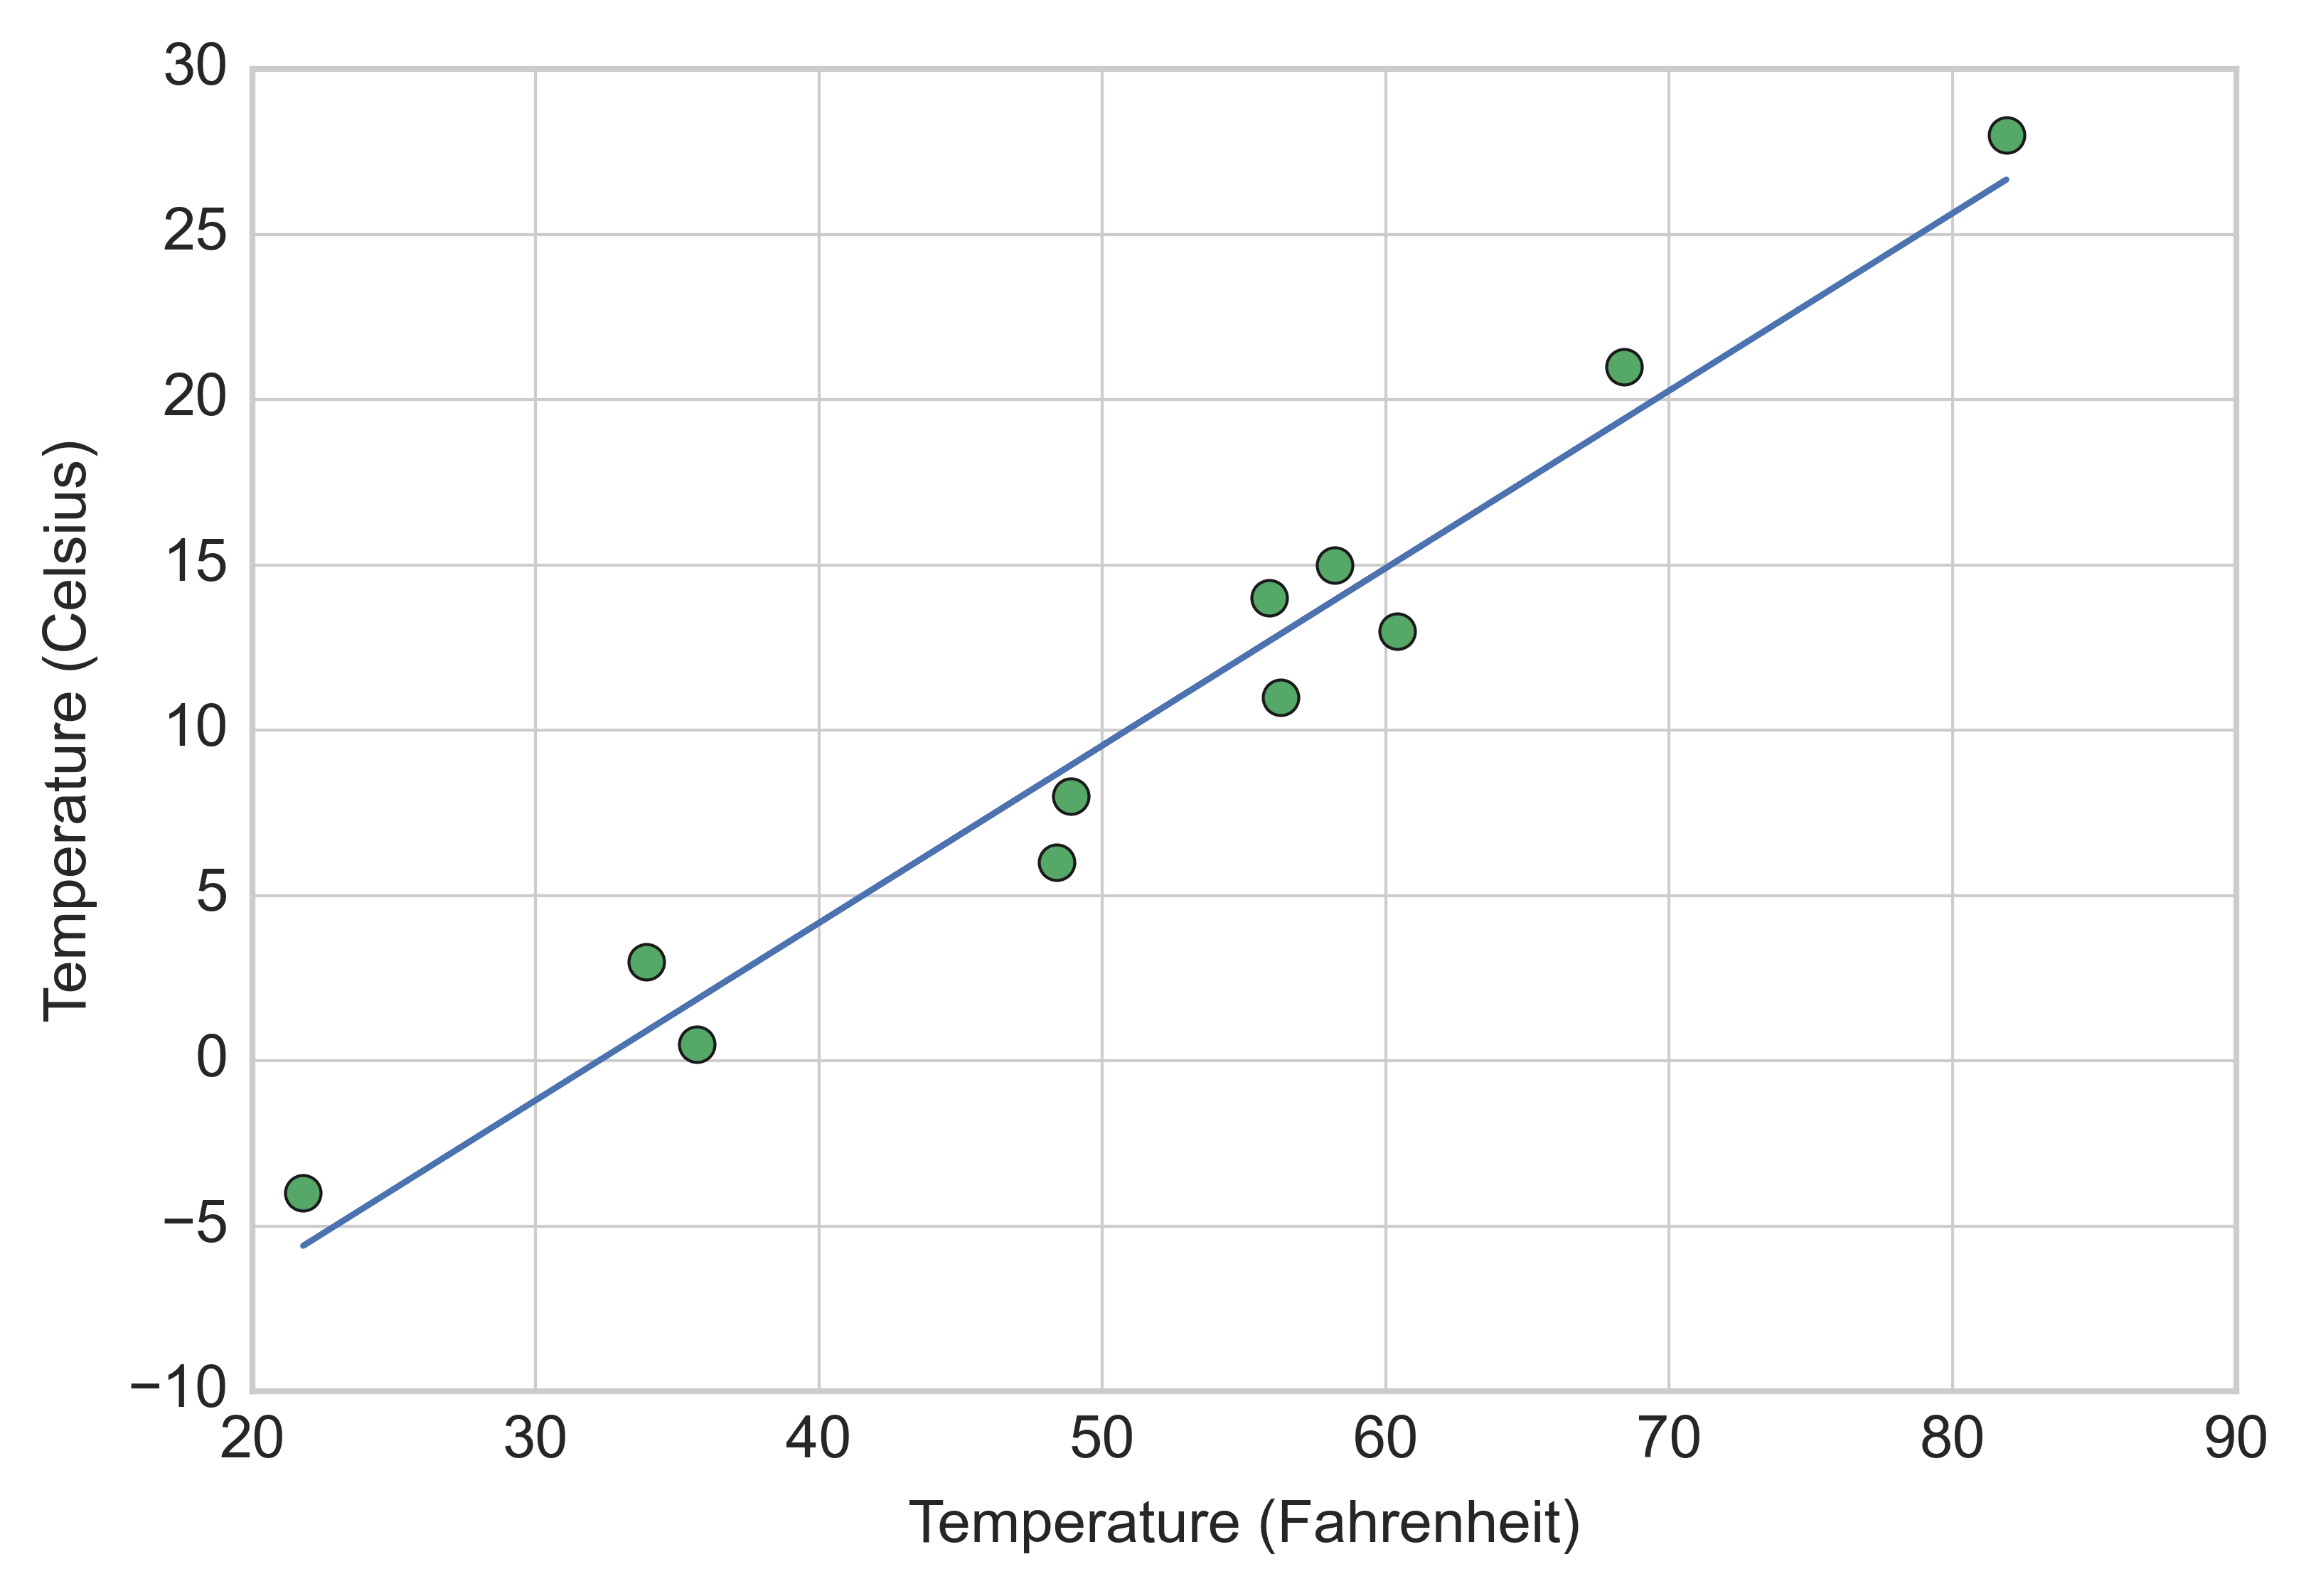

In [42]:
%matplotlib inline
from matplotlib import pyplot as pyplot

t_p = model(t_un, *params)

fig = plt.figure(dpi=600, facecolor='white')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()